In [14]:
# Import modules and subroutines:
include("../subroutines/Subroutines.jl");

3.10.9


In [15]:
# Load the chemical data into julia as an array of chemical data structs:
# (one struct obtained for each molecular geometry as set up in the config file)

bond_lengths = [1.2,1.21,1.22,1.23,1.24,1.25,1.252,1.254,1.256,1.258,1.26,1.262,1.264,1.266,1.268,1.27,1.272,1.274,1.276,1.278,1.28,1.282,1.284,1.286,1.288,1.29,1.292,1.294,1.296,1.298,1.3,1.32,1.34,1.36,1.38,1.4];

md_fname = "h8_sto3g_011024%1112.hdf5"

chemical_data_list = ReadIn("../datasets/pyscf_data/"*md_fname)

PrintChemData(chemical_data_list[10])

Molecule name: h8
Basis set: sto3g
Molecular geometry: ../configs/xyz_files/h8_symmetric/1.4.xyz
RHF energy: -3.766989127731099
FCI energy: -3.9964245524115523


In [16]:
e_rhf_vec = [chemical_data_list[m].e_rhf for m=1:length(chemical_data_list)]
e_fci_vec = [chemical_data_list[m].e_fci for m=1:length(chemical_data_list)]

26-element Vector{Float64}:
 -0.3098613945785722
 -2.10875133754892
 -3.0770112255927735
 -3.601676629652788
 -3.879051772011403
 -4.013731332913723
 -4.064149852694934
 -4.064847831785311
 -4.037504918780854
 -3.9964245524115523
 -3.951294736011212
 -3.9084880064900576
 -3.871504933625432
 -3.841292718973853
 -3.8171437033911912
 -3.7978735425552186
 -3.782489375943486
 -3.770281083145531
 -3.760710719275374
 -3.7533223825246917
 -3.7477079773792266
 -3.7412749151483764
 -3.740399097400095
 -3.7369653470543946
 -3.736495576906334
 -3.7347667525994277

In [4]:
e_fci2_vec = []

for m=1:length(chemical_data_list)
    fci_mps, ham_mpo = FCIMPS(chemical_data_list[m])
    e_fci2 = inner(fci_mps', ham_mpo, fci_mps)
    push!(e_fci2_vec, e_fci2)
    println("Progress: $(m)/$(length(chemical_data_list))")
end

LoadError: InterruptException:

In [10]:
fci_mps, ham_mpo = FCIMPS(chemical_data_list[18])
e_fci2 = inner(fci_mps', ham_mpo, fci_mps)

-6.948537544030064

In [12]:
fci_mps2, ham_mpo2 = FCIMPS(chemical_data_list[18], spin=2)
e_fci3 = inner(fci_mps2', ham_mpo2, fci_mps2)

-6.903270104698896

In [4]:
for m=1:length(chemical_data_list)
    e_fci2_vec[m] += chemical_data_list[m].e_nuc
end

LoadError: UndefVarError: e_fci2_vec not defined

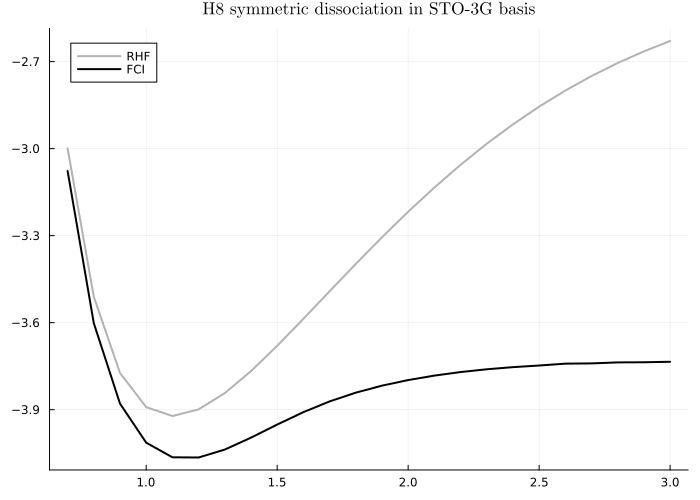

In [24]:

bond_lengths2 = [0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0]

plot(
    bond_lengths2[3:end], 
    e_rhf_vec[3:end], 
    color=RGB(0.7,0.7,0.7), 
    linewidth=2.0,
    label="RHF",
    title="H8 symmetric dissociation in STO-3G basis",
    titlefontsize=11.0,
    titlefont=font(14,"Computer Modern"),
    #xguide=L"r\quad(\AA)",
    #yguide=L"E\quad(\textrm{Ha.})",
    size=(700,500)
)

plot!(
    bond_lengths2[3:end], 
    e_fci_vec[3:end], 
    color=RGB(0.0,0.0,0.0), 
    linewidth=2.0,
    label="FCI"
)

In [9]:
e_nuc = [chemical_data_list[m].e_nuc for m=1:length(chemical_data_list)]

21-element Vector{Float64}:
 10.567966695741982
  9.607242450674532
  8.806638913118316
  8.129205150570755
  7.548547639815704
  7.045311130494659
  6.60497918483874
  6.216450997495282
  5.871092608745549
  5.562087734601046
  5.283983347870991
  5.032365093210469
  4.803621225337266
  4.594768128583472
  4.403319456559158
  4.227186678296794
  4.064602575285377
  3.914061739163699
  3.774273819907852
  3.6441264468075807
  3.5226555652473297

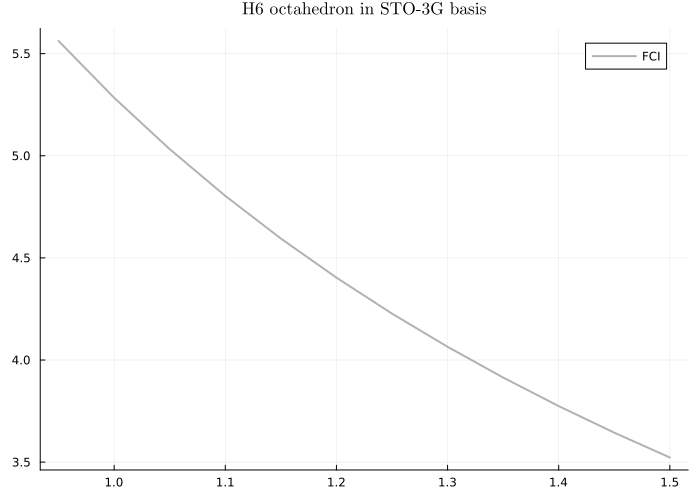

In [10]:
plot(
    bond_lengths[10:end], 
    e_nuc[10:end],
    #e_fci_vec[10:end], 
    color=RGB(0.7,0.7,0.7), 
    linewidth=2.0,
    label="FCI",
    title="H6 octahedron in STO-3G basis",
    titlefontsize=11.0,
    titlefont=font(14,"Computer Modern"),
    #xguide=L"r\quad(\AA)",
    #yguide=L"E\quad(\textrm{Ha.})",
    size=(700,500)
)

In [ ]:
"""
plot!(
    bond_lengths[10:end], 
    e_fci2_vec[10:end], 
    color=RGB(0.3,0.3,0.3), 
    linewidth=2.0,
    label="FCI2"
)
"""

In [ ]:
plot!(
    bond_lengths, 
    e_fci_vec, 
    color=RGB(0.3,0.3,0.3), 
    linewidth=2.0,
    label="FCI"
)

In [17]:
N = chemical_data_list[1].N_spt

h_el_vecs = []

for p=1:N, q=1:N, r=1:N, s=1:N
    
    push!(h_el_vecs, [cdata.h2e[p,q,r,s] for cdata in chemical_data_list])
    
end

In [36]:
plot(
    bond_lengths[10:end], 
    h_el_vecs[1][10:end], 
    linewidth=2.0,
    title="H6 octahedron in STO-3G basis",
    titlefontsize=11.0,
    titlefont=font(14,"Computer Modern"),
    #ylim=(-1.0,1.0),
    #xguide=L"r\quad(\AA)",
    #yguide=L"E\quad(\textrm{Ha.})",
    size=(700,500)
)

for k=2:length(h_el_vecs)

    plot!(
        bond_lengths[10:end], 
        h_el_vecs[k][10:end], 
        linewidth=2.0
    )
    
end

savefig("../plots/test3.pdf")


"/home/oskar/Documents/TNQE/TNQE-Julia/plots/test3.pdf"